In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
import pandas as pd
import numpy as np

# Define the path to the dataset
data_dir = '/content/drive/MyDrive/WQU_Task4/individual_stocks_5yr/individual_stocks_5yr'

# Initialize an empty dictionary to store closing prices
all_data = {}

# Loop through all files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('_data.csv'):  # Only process stock data files
        ticker = filename.split('_')[0]  # Extract ticker symbol (e.g., 'AAPL')
        file_path = os.path.join(data_dir, filename)
        try:
            # Load the stock data
            data = pd.read_csv(file_path)

            # Ensure the 'date' column is parsed as datetime
            data['date'] = pd.to_datetime(data['date'])

            # Use the 'close' column as a proxy for adjusted closing prices
            if 'close' in data.columns:
                adj_close = data.set_index('date')['close']
                all_data[ticker] = adj_close
            else:
                raise ValueError("Closing price column not found")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Combine all data into a single DataFrame
prices_df = pd.DataFrame(all_data).dropna()

# Print the resulting DataFrame shape
print(f"Prices DataFrame Shape: {prices_df.shape}")

Prices DataFrame Shape: (44, 505)


In [13]:
# Inspect the structure of CL_data.csv
file_path = os.path.join(data_dir, 'CL_data.csv')
data = pd.read_csv(file_path)
print("Column Names:")
print(data.columns)

Column Names:
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [14]:
# Compute daily returns
returns_df = prices_df.pct_change().dropna()

# Print the first few rows of the returns DataFrame
print("\nDaily Returns Preview:")
print(returns_df.head())


Daily Returns Preview:
                DWDP      CTAS       COG       BXP      COST       AES  \
date                                                                     
2017-12-06 -0.006430  0.001408 -0.009884 -0.000638 -0.003195  0.010261   
2017-12-07  0.004080  0.009585 -0.009626 -0.011642 -0.005448 -0.012004   
2017-12-08 -0.008967  0.007468 -0.001080  0.005728  0.010043  0.005607   
2017-12-11  0.001131 -0.005340  0.020901  0.003129  0.004201  0.009294   
2017-12-12 -0.000282 -0.007200 -0.025768  0.009036 -0.002965 -0.012891   

                 COP      CINF       ETN       AXP  ...       XRX       VMC  \
date                                                ...                       
2017-12-06 -0.016592  0.001076  0.011207 -0.005065  ...  0.006793 -0.013039   
2017-12-07  0.003176 -0.004029  0.019396  0.003767  ... -0.001687  0.031129   
2017-12-08  0.020380  0.003236  0.000388 -0.000304  ...  0.000000  0.008008   
2017-12-11  0.002327  0.002151  0.006210  0.004566  ...  0.000

In [15]:
# Step 4: Compute Covariance Matrix
cov_matrix = returns_df.cov()

# Print the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)



Covariance Matrix:
              DWDP      CTAS       COG       BXP      COST       AES  \
DWDP  2.490529e-04  0.000096  0.000178  0.000074  0.000090  0.000110   
CTAS  9.551310e-05  0.000104  0.000064  0.000063  0.000060  0.000061   
COG   1.777956e-04  0.000064  0.000361  0.000048  0.000095  0.000091   
BXP   7.418323e-05  0.000063  0.000048  0.000177  0.000060  0.000052   
COST  9.011380e-05  0.000060  0.000095  0.000060  0.000147  0.000108   
...            ...       ...       ...       ...       ...       ...   
VFC   3.735924e-05  0.000044  0.000029  0.000020  0.000055  0.000068   
VTR   5.750155e-05  0.000051  0.000023  0.000130  0.000058  0.000051   
WYNN -3.883925e-05  0.000019  0.000009 -0.000019  0.000017 -0.000145   
XOM   1.034506e-04  0.000083  0.000169  0.000043  0.000098  0.000104   
XEL  -7.506973e-07  0.000038  0.000019  0.000053  0.000036  0.000029   

           COP      CINF       ETN       AXP  ...       XRX       VMC  \
DWDP  0.000091  0.000049  0.000087  0.0001

In [18]:
from sklearn.decomposition import PCA
# Step 5: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(returns_df)
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio
print("\nExplained Variance Ratio (PCA):")
print(explained_variance)



Explained Variance Ratio (PCA):
[3.17449626e-01 6.25541078e-02 4.81491888e-02 3.99602164e-02
 3.72209475e-02 3.35148205e-02 3.02986704e-02 2.76202654e-02
 2.49953077e-02 2.40067125e-02 2.20018266e-02 2.10962344e-02
 1.89976536e-02 1.75864572e-02 1.72324476e-02 1.66352073e-02
 1.60704359e-02 1.53185136e-02 1.50225471e-02 1.46946848e-02
 1.40154830e-02 1.28167575e-02 1.26505508e-02 1.20192354e-02
 1.16142627e-02 1.09308114e-02 1.01139439e-02 9.84301438e-03
 9.02898135e-03 8.56451611e-03 8.29440878e-03 7.73843638e-03
 7.59545988e-03 6.99678737e-03 6.94571582e-03 6.27899887e-03
 5.55020627e-03 4.74799835e-03 4.41418094e-03 3.86191474e-03
 2.99658108e-03 2.55588370e-03 6.26058999e-32]


In [19]:

# Step 6: Perform SVD
U, S, Vt = np.linalg.svd(cov_matrix)

# Print singular values
print("\nSingular Values (SVD):")
print(S)



Singular Values (SVD):
[4.22580470e-02 8.32703589e-03 6.40949151e-03 5.31939736e-03
 4.95475320e-03 4.46140346e-03 4.03327814e-03 3.67673602e-03
 3.32730865e-03 3.19570951e-03 2.92882443e-03 2.80827442e-03
 2.52891695e-03 2.34106225e-03 2.29393744e-03 2.21443440e-03
 2.13925354e-03 2.03915965e-03 1.99976138e-03 1.95611722e-03
 1.86570369e-03 1.70613256e-03 1.68400756e-03 1.59996855e-03
 1.54605965e-03 1.45508044e-03 1.34634122e-03 1.31027581e-03
 1.20191390e-03 1.14008553e-03 1.10412956e-03 1.03012000e-03
 1.01108735e-03 9.31393662e-04 9.24595153e-04 8.35843573e-04
 7.38828646e-04 6.32040869e-04 5.87603987e-04 5.14087783e-04
 3.98896876e-04 3.40232417e-04 2.13806892e-17 6.67921963e-18
 4.08755153e-18 4.08755153e-18 4.08755153e-18 4.08755153e-18
 4.08755153e-18 4.08755153e-18 4.08755153e-18 4.08755153e-18
 4.08755153e-18 4.08755153e-18 4.08755153e-18 4.08755153e-18
 4.08755153e-18 4.08755153e-18 4.08755153e-18 4.08755153e-18
 4.08755153e-18 4.08755153e-18 4.08755153e-18 4.08755153e-18


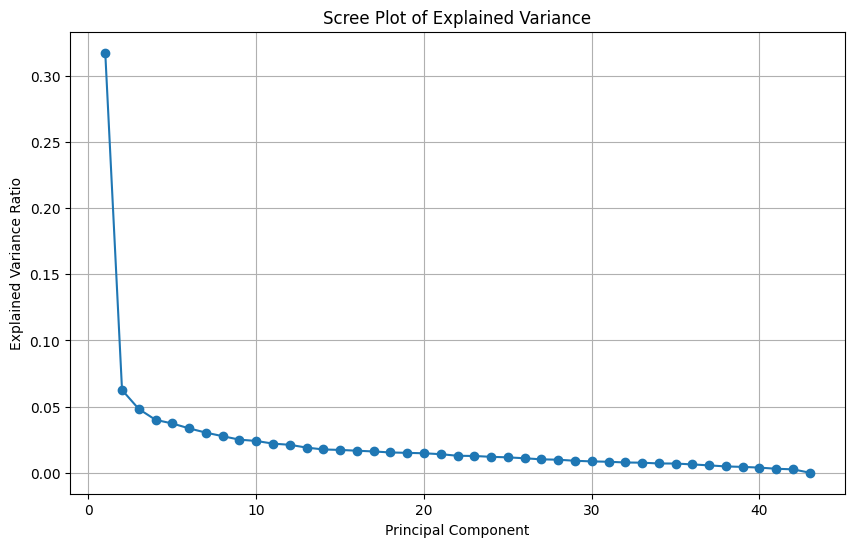

In [21]:
import matplotlib.pyplot as plt
# Step 7: Visualizations
# Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

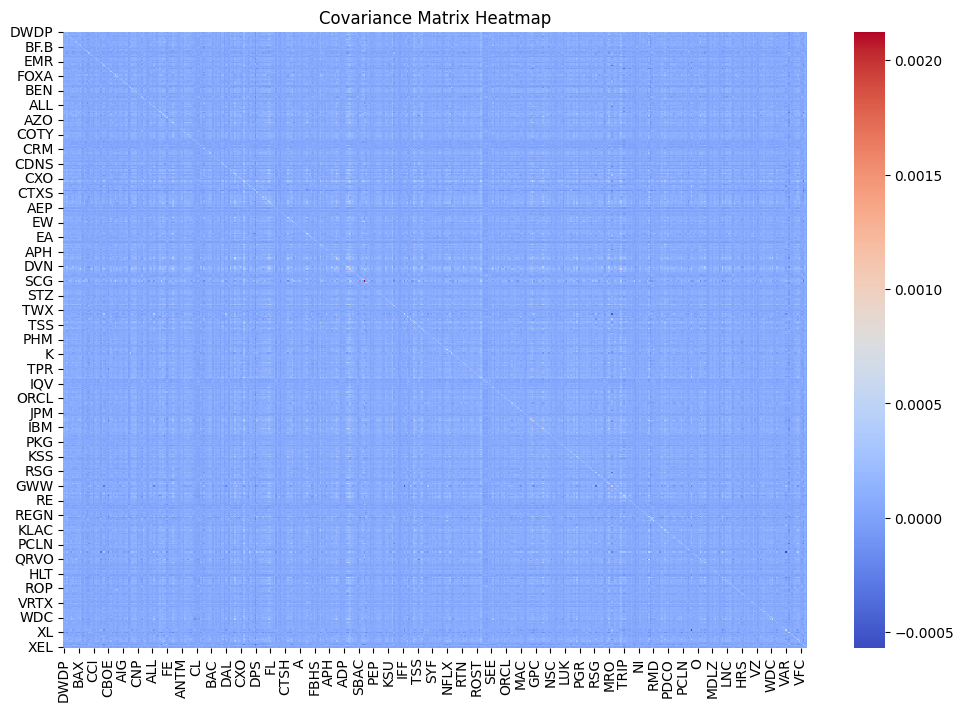

In [23]:
import seaborn as sns
# Heatmap of Covariance Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, cmap='coolwarm', annot=False)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [24]:

# Step 8: Interpretation (Print Key Results)
print("\nTop 5 Eigenvectors (PCA):")
print(pca.components_[:5])

# Additional Interpretation
print("\nKey Insights:")
print("1. The first principal component explains the largest proportion of variance.")
print("2. Singular values indicate the importance of each dimension in the data.")


Top 5 Eigenvectors (PCA):
[[ 0.05811365  0.03214686  0.06091315 ... -0.00281216  0.05437171
   0.00346748]
 [ 0.01275586  0.04263893 -0.04366108 ...  0.0058134   0.00794854
   0.06810065]
 [ 0.05101396  0.01053209  0.05228765 ... -0.10484237 -0.02186964
   0.02040563]
 [-0.02854154  0.02051434  0.02599461 ...  0.15131361  0.01156248
   0.05452788]
 [-0.02828475 -0.00320748 -0.05707429 ...  0.10273525 -0.04540468
   0.00468335]]

Key Insights:
1. The first principal component explains the largest proportion of variance.
2. Singular values indicate the importance of each dimension in the data.
